# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [51]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [52]:
sample_size = 400

We need to create a set of X (input) values. We could simply create a linear sequence...

In [53]:
# create sample_size number of x values between 0 and 100
X = np.linspace(0, 100, sample_size)

OR, to better similate 'real world' data, let's select 1000 

In [54]:
x_mean = 0
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [55]:
y = b0 + b1 * X 

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

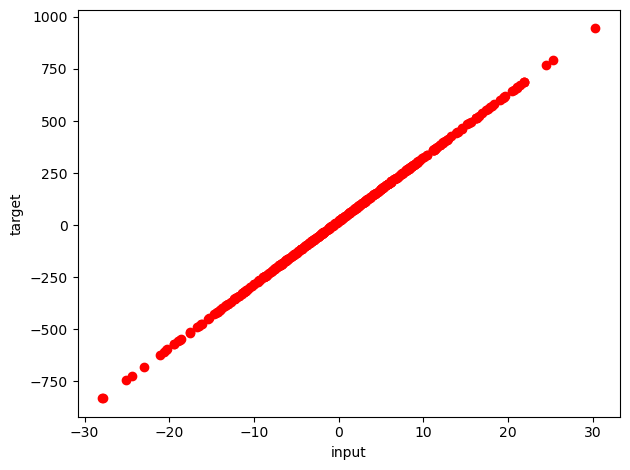

In [56]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [57]:
e_mean = 0
e_stdev = 100
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

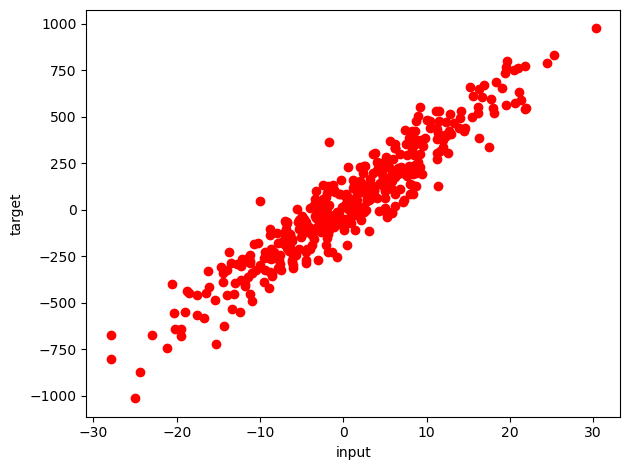

In [58]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [59]:
df = pd.DataFrame({'input': X, 'target': y})
df.head(3)

,input,target
0,16.24,384.67
1,-6.12,-159.02
2,-5.28,-104.32


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [60]:
df.to_csv('c02_dataset_1-new.csv', index=False)

# Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [62]:
df = pd.read_csv('c02_dataset_1-sample.csv')

df.head(3)

,input,target
0,16.24,343.38
1,-6.12,-160.95
2,-5.28,-220.99


Seperate out the input m(X) and the target (y)

In [63]:
X=df[['input']]
y=df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

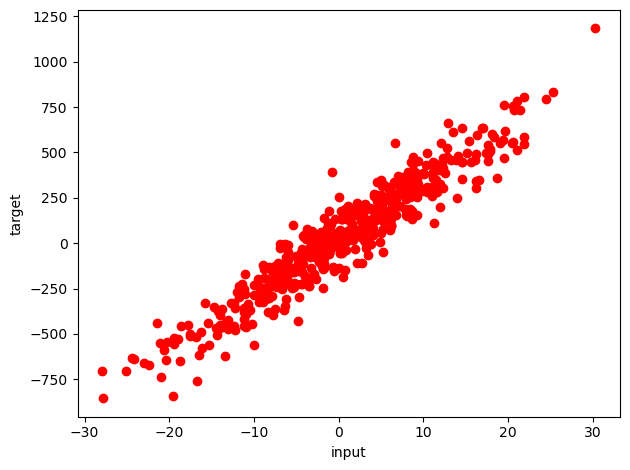

In [64]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [65]:
lin_reg=LinearRegression()
_ = lin_reg.fit(X,y) # note the underscore. This is a convention to indicate that the output is not used.


# OR, we could combine the two lines above to one as follows...
#lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

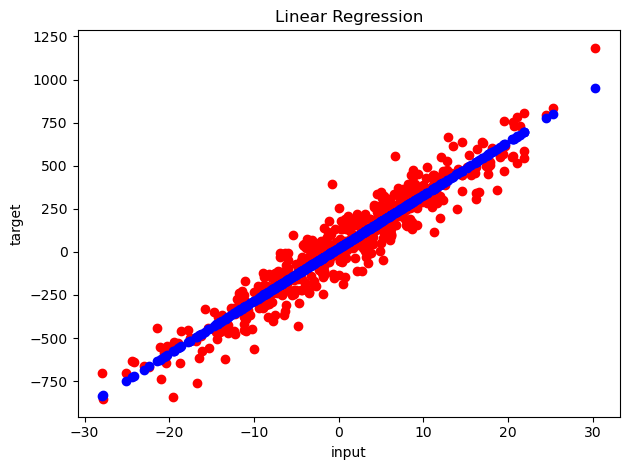

In [66]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X, lin_reg.predict(X), color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [67]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X, y)

... using fstring formatting, we can display these values as follows...

In [68]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {lin_reg.score(X, y):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 22.30 + 30.72x
R^2: 0.907


Here when we are decresing the sample size the R square value is increased.From this we can tell that when the sample size is decresed some of 
the data might be decreased and also there might be a decrease in noise in the data which might appear to be the best fit for the new 
sample size.But decrease in sample size and increase in the r square value might also result in overfit of data because some data might be lost 
due to decrease in size and incresed R square value data might not be considered to be the best fitted model.